In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv(r'H:\Projects\minor project I\Dataset\modified_dataset.csv')
df.head()

,name,university_board,stream,percentage_10th,percentage_12th,competetive_exam_marks,admitted,Branch
0,vinay panwar,STATE BOARD,PCM,83.00,86.00,0.0,1,CSE
1,Shivani Gupta,C.B.S.E BOARD,PCM,92.00,80.00,0.0,1,EC
2,Utkarsh kalawat,STATE BOARD,PCM,54.00,62.00,45.0,1,IT
3,Rupali wanare,STATE BOARD,PCM,63.33,65.33,63.0,1,ME
4,Monika rathod,STATE BOARD,PCM,74.00,71.00,55.0,0,CSE


In [3]:
df['competetive_exam_marks'].fillna('0',inplace=True )
df.head()

,name,university_board,stream,percentage_10th,percentage_12th,competetive_exam_marks,admitted,Branch
0,vinay panwar,STATE BOARD,PCM,83.00,86.00,0.0,1,CSE
1,Shivani Gupta,C.B.S.E BOARD,PCM,92.00,80.00,0.0,1,EC
2,Utkarsh kalawat,STATE BOARD,PCM,54.00,62.00,45.0,1,IT
3,Rupali wanare,STATE BOARD,PCM,63.33,65.33,63.0,1,ME
4,Monika rathod,STATE BOARD,PCM,74.00,71.00,55.0,0,CSE


In [4]:
#inputs = df['university_board','STREAM :','percentage_10th','percentage_12th','competetive_exam_marks']
inputs =  df.drop(['name','admitted'],axis = 'columns')

target =df.admitted
print(inputs.head())
print(target.head())

  university_board stream  percentage_10th  percentage_12th  \
0      STATE BOARD    PCM            83.00            86.00   
1    C.B.S.E BOARD    PCM            92.00            80.00   
2      STATE BOARD    PCM            54.00            62.00   
3      STATE BOARD    PCM            63.33            65.33   
4      STATE BOARD    PCM            74.00            71.00   

   competetive_exam_marks Branch  
0                     0.0    CSE  
1                     0.0     EC  
2                    45.0     IT  
3                    63.0     ME  
4                    55.0    CSE  
0    1
1    1
2    1
3    1
4    0
Name: admitted, dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
n_lable = LabelEncoder()

In [7]:
inputs['n_board '] = n_lable.fit_transform(df['university_board'])
inputs['n_stream'] = n_lable.fit_transform(df['stream'])
inputs['n_branch'] = n_lable.fit_transform(df['Branch'])
inputs.head()

,university_board,stream,percentage_10th,percentage_12th,competetive_exam_marks,Branch,n_board,n_stream,n_branch
0,STATE BOARD,PCM,83.00,86.00,0.0,CSE,3,1,0
1,C.B.S.E BOARD,PCM,92.00,80.00,0.0,EC,0,1,1
2,STATE BOARD,PCM,54.00,62.00,45.0,IT,3,1,2
3,STATE BOARD,PCM,63.33,65.33,63.0,ME,3,1,3
4,STATE BOARD,PCM,74.00,71.00,55.0,CSE,3,1,0


In [8]:
new_inputs = inputs.drop(['university_board','stream','Branch'],axis = 'columns')
new_input = new_inputs.copy()
new_input.head()

,percentage_10th,percentage_12th,competetive_exam_marks,n_board,n_stream,n_branch
0,83.00,86.00,0.0,3,1,0
1,92.00,80.00,0.0,0,1,1
2,54.00,62.00,45.0,3,1,2
3,63.33,65.33,63.0,3,1,3
4,74.00,71.00,55.0,3,1,0


In [9]:
new_inputs.describe()

,percentage_10th,percentage_12th,competetive_exam_marks,n_board,n_stream,n_branch
count,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,78.844333,72.835500,39.68500,2.066667,0.783333,1.383333
std,10.694204,10.635108,82.58654,1.351291,0.415450,1.222552
min,52.000000,52.000000,0.00000,0.000000,0.000000,0.000000
25%,73.000000,63.600000,0.00000,0.000000,1.000000,0.000000
50%,80.115000,74.400000,0.50000,3.000000,1.000000,1.500000
75%,89.000000,80.000000,55.25000,3.000000,1.000000,2.250000
max,95.000000,96.000000,512.00000,3.000000,1.000000,3.000000


In [10]:
new_inputs.head()

,percentage_10th,percentage_12th,competetive_exam_marks,n_board,n_stream,n_branch
0,83.00,86.00,0.0,3,1,0
1,92.00,80.00,0.0,0,1,1
2,54.00,62.00,45.0,3,1,2
3,63.33,65.33,63.0,3,1,3
4,74.00,71.00,55.0,3,1,0


In [11]:
#from sklearn import tree
from sklearn import linear_model
from sklearn import tree

In [12]:
#model = tree.DecisionTreeClassifier()
model = linear_model.LogisticRegression()

In [13]:
#model decisiontree
model1 = tree.DecisionTreeClassifier()

In [14]:
#training the model using logistic regression
model.fit(new_inputs,target)

LogisticRegression()

In [15]:
#training the model using Logisticregression
model.score(new_input,target)

0.7166666666666667

In [16]:
#training the model using Decisiontree
model1.fit(new_inputs,target)

DecisionTreeClassifier()

In [17]:
#checkin the accuracy of decision tree model
model1.score(new_inputs,target)

1.0

In [18]:
#logistics regression 
model.predict([[89,87,78,3,1,1]])

array([1], dtype=int64)

In [20]:
#decision tree classifier prediction 
model1.predict([[89,87,78,3,1,1]])

array([1], dtype=int64)

In [21]:
import matplotlib.pyplot as plt

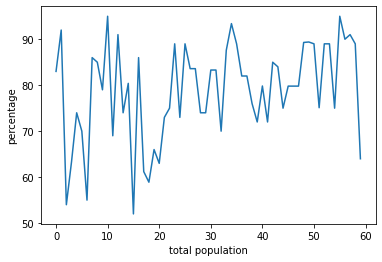

In [22]:
new_inputs['percentage_10th'].plot()
plt.xlabel('total population')
plt.ylabel("percentage")
plt.show()

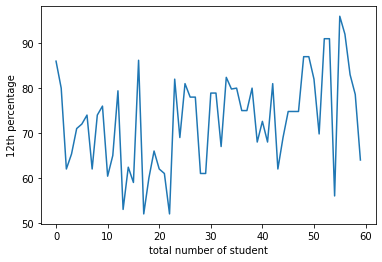

In [23]:
new_inputs['percentage_12th'].plot()
plt.xlabel("total number of student")
plt.ylabel("12th percentage")
plt.show()

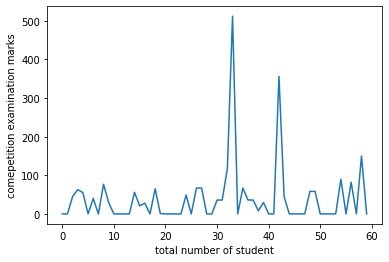

In [24]:
new_inputs["competetive_exam_marks"].plot()
plt.xlabel("total number of student")
plt.ylabel("comepetition examination marks")
plt.show()

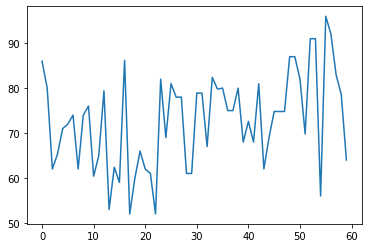

In [25]:
plt.plot(new_inputs['percentage_12th'])
plt.show()

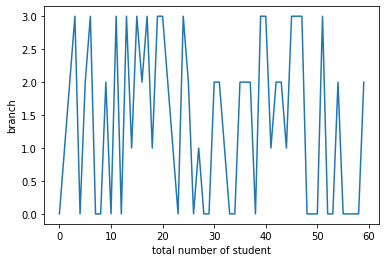

In [26]:
new_inputs["n_branch"].plot()
plt.xlabel("total number of student")
plt.ylabel("branch")
plt.show()

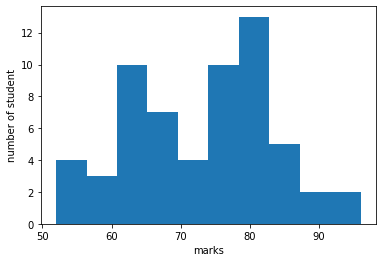

In [27]:
plt.hist(new_inputs['percentage_12th'])
plt.xlabel("marks")
plt.ylabel("number of student")
plt.show()

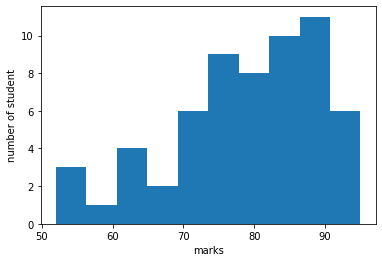

In [28]:
plt.hist(new_inputs['percentage_10th'])
plt.xlabel("marks")
plt.ylabel("number of student")
plt.show()

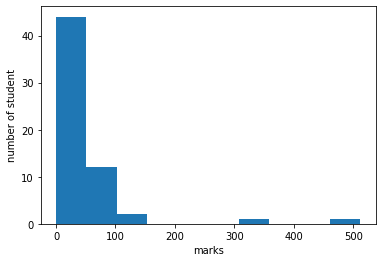

In [29]:
plt.hist(new_inputs['competetive_exam_marks'])
plt.xlabel("marks")
plt.ylabel("number of student")
plt.show()

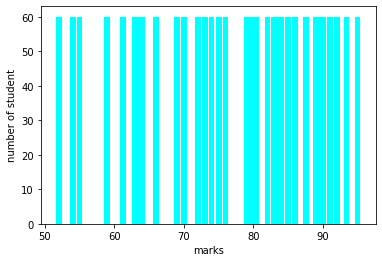

In [30]:
plt.bar(new_inputs['percentage_10th'],60,color='cyan')
plt.xlabel("marks")
plt.ylabel("number of student")
plt.show()

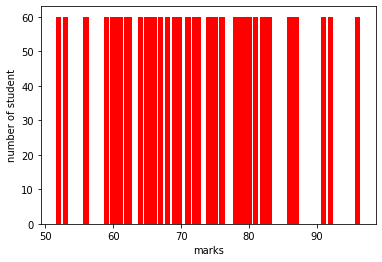

In [31]:
plt.bar(new_inputs['percentage_12th'],60,color='red')
plt.xlabel("marks")
plt.ylabel("number of student")
plt.show()

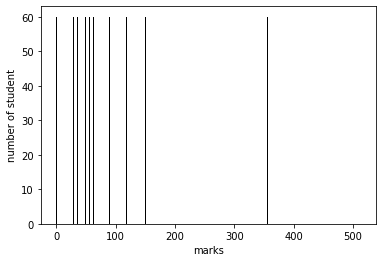

In [32]:
plt.bar(new_inputs['competetive_exam_marks'],60,color='black')
plt.xlabel("marks")
plt.ylabel("number of student")
plt.show()

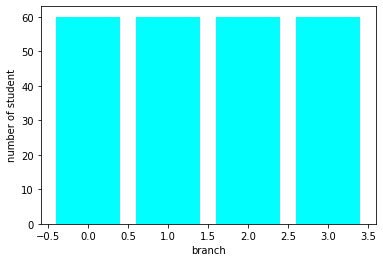

In [33]:
plt.bar(new_inputs['n_branch'],60,color='cyan')
plt.xlabel("branch")
plt.ylabel("number of student")
plt.show()

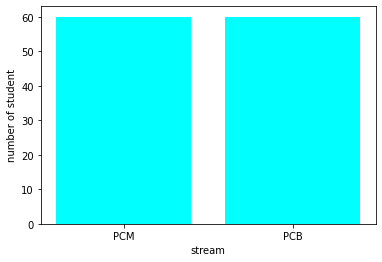

In [34]:
plt.bar(df["stream"],60,color='cyan')
plt.xlabel("stream")
plt.ylabel("number of student")
plt.show()

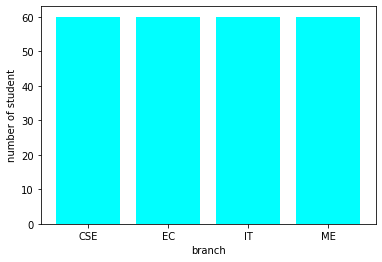

In [35]:
plt.bar(df["Branch"],60,color='cyan')
plt.xlabel("branch")
plt.ylabel("number of student")
plt.show()

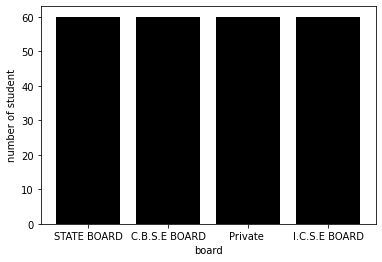

In [36]:
plt.bar(df["university_board"],60,color='black')
plt.xlabel("board")
plt.ylabel("number of student")
plt.show()

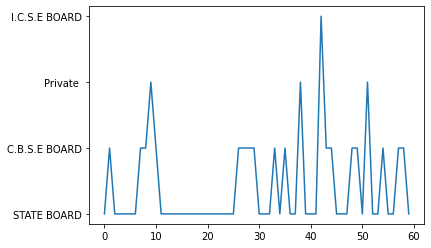

In [37]:
plt.plot(df['university_board'])
plt.show()

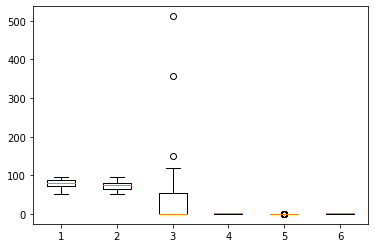

In [38]:
plt.boxplot(new_inputs)
plt.show()

In [39]:
new_inputs.describe()


,percentage_10th,percentage_12th,competetive_exam_marks,n_board,n_stream,n_branch
count,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,78.844333,72.835500,39.68500,2.066667,0.783333,1.383333
std,10.694204,10.635108,82.58654,1.351291,0.415450,1.222552
min,52.000000,52.000000,0.00000,0.000000,0.000000,0.000000
25%,73.000000,63.600000,0.00000,0.000000,1.000000,0.000000
50%,80.115000,74.400000,0.50000,3.000000,1.000000,1.500000
75%,89.000000,80.000000,55.25000,3.000000,1.000000,2.250000
max,95.000000,96.000000,512.00000,3.000000,1.000000,3.000000


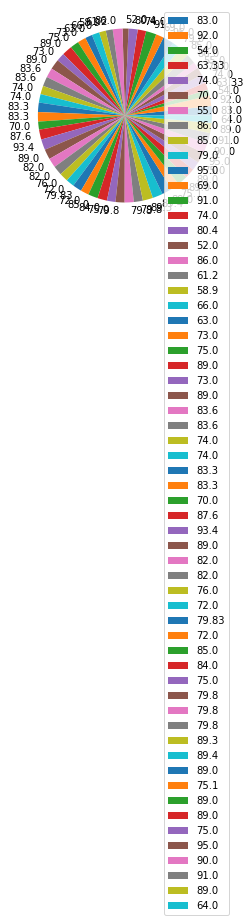

In [40]:
plt.pie(new_inputs['percentage_10th'],labels = new_inputs['percentage_10th'])
plt.legend()
plt.show()